# **The Sobel–Feldman Operator**

**Recommended Reading/Viewing:**

1. [Finding the Edges (Sobel Operator) - Computerphile](https://youtu.be/uihBwtPIBxM)

**Additional Reading**
1. The History and Definition of the Sobel Operator - Irwin Sobel. In "papers" directory of this Repo.

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

![](../graphics/sobel_and_feldman-01.png)

- A couple years after the MIT summer project, in 1968, Irwin Sobel and Gary Feldman, two graduate students at Stanford Artificial Intelligence Labs (SAIL) gave a talk: **"A 3x3 Isotropic Gradient Operator for Image Processing"**
- The excerpt above is from a write-up from Irwin Sobel much later (It's in the papers directory of this repo), I think the phrase 

>"**the** major peice of published work on computer vision was..." 

is pretty remarkable!
- Sobel and Feldman presented a simple gradent operator as an alternative to Robert's cross that is still quite popular today. 
- One reason the the Sobel-Feldman operator caught no so quickly and remains in favor today is becuase of just who was in the audience of this presentation.

![](../graphics/sobel_audience-01.png)

- The small audence that attended Sobel and Feldman's talk included Aurthur Samuel, who coined the term "machine learning", and John McCarthy who coined the term "Artificial Intelligence"!
- Also in attendence was Raj Reddy, an incredibly prolific computer scientist, who was at the time teaching one of the first computer vision courses!
- Raj Reddy quickly adoped the name **"Sobel Operator"** in his course, and the technique and name picked up from there.
- Just as Raj Reddy did 50 years ago, let's dig into the Sobel operator, and see if it can be of use to us. 
- Let's quickly review the issues we came across with Robert's cross, and dive into the **Sobel-Feldman Operator.**

### **Problems with our implementation of Robert's Cross**

1. **Noisy** - Robert's Cross is quite susceptible to noise.
2. **Anisotropic** - doesn't respond as strongly to slanted edges. 
3. **Slow** as we've implemented it here.
4. **No Direction** - as we've implemented Robert's Cross here, we only learn about the **magnitude** of our esimate of the image intensity derivative, not its **direction.** 

### **Let's get it**
- We made some progress on problem (1) in the Image Filtering notebook. 
- Let's see if the Sobel-Feldman operator can help us with our other problems.
- The Sobel-Feldman operator uses 2 (3x3) kernels to calculate approximations of the horizontal and vertical derivatives of our image:

$$
\mathbf{K}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} 
\quad
\quad   
\mathbf{K}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
$$

- Let's give some thought to how these kernels work, and then code them up!

![](../graphics/sobel_question_one-01.png)

---

![](../graphics/sobel_question_two-01.png)

___

![](../graphics/sobel_question_three-01.png)

___

![](../graphics/sobel_question_four-01.png)

___


- Much like Robert's cross, the sobel operators respond strongly to areas of high image gradient - these often correspond to what we would call edges. 

$$
\mathbf{K}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} 
\quad
\quad   
\mathbf{K}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
$$

- Answers: d, a, b, a
- To compute edges using the **Sobel-Feldman** operator, we first filter our image with $K_x$ and $K_y$ seperately. 
- Let's code this up. 
- We can use our method from last time, `filter_2d` to make life easier.

In [47]:
%pylab inline
import os, sys
sys.path.append('..')

from util.filters import filter_2d
from util.image import convert_to_grayscale

Populating the interactive namespace from numpy and matplotlib


In [48]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

In [49]:
#Import an image to work on.
im = imread('../data/easy/brick/brick_2.jpg')
gray = convert_to_grayscale(im/255.)

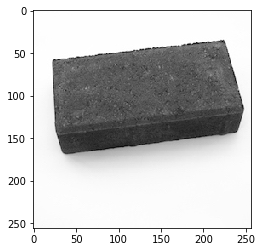

In [52]:
imshow(gray, cmap = 'gray');

And, now filter our image with $K_x$ and $K_y$ seperately. We'll call our filtered images $G_x$ and $G_y$.

In [56]:
Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

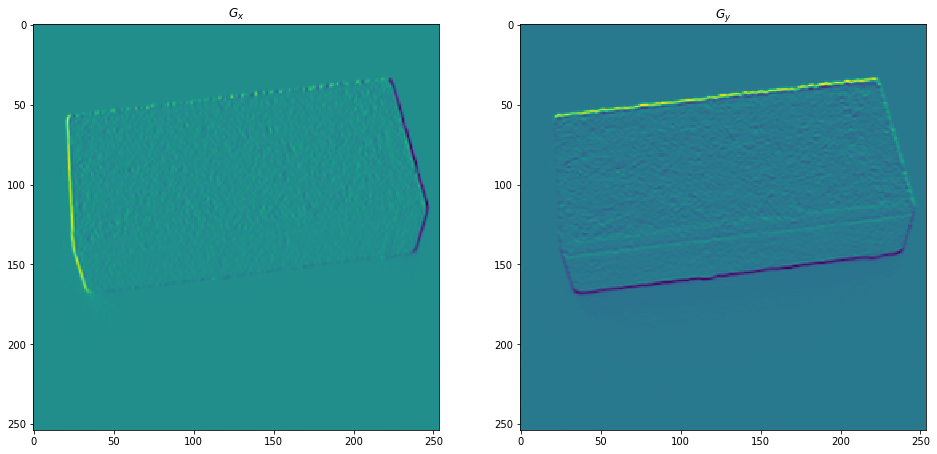

In [61]:
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(Gx)
title('$G_x$');

fig.add_subplot(1,2,2)
imshow(Gy)
title('$G_y$');

- Alright, we now have an estimate of the gradient of our images in the x and y direction!
- The next step here is reasonably simple - we would like to estimate the overall gradient for each pixel in our images.
- We can do this by taking the gradient magnitude:

$$
\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }
$$

In [63]:
#Compute Gradient Magnitude:
G = np.sqrt(Gx**2+Gy**2)

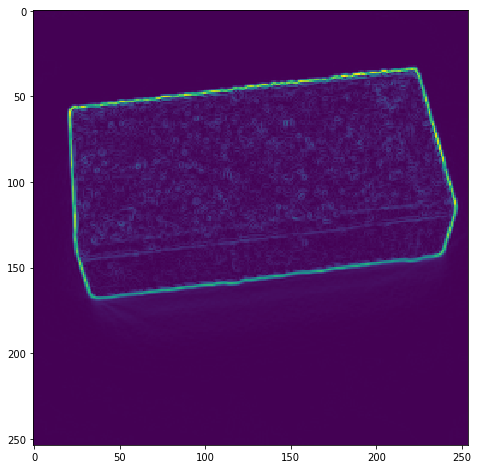

In [66]:
fig = figure(0, (8,8))
imshow(G);

- Not bad, right? Our edges show up quite nicely!
- Let's make a quick comparison to Robert's Cross:

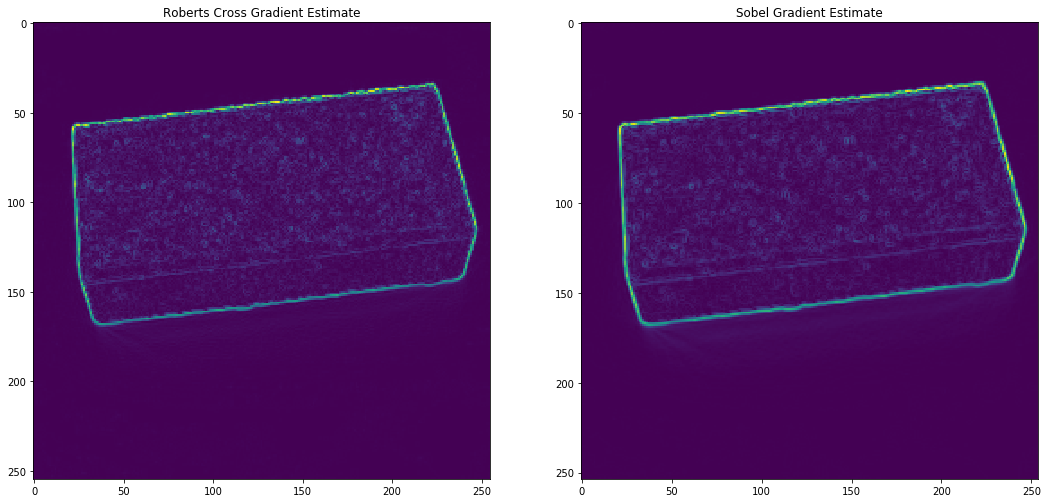

In [72]:
from util.filters import roberts_cross
fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
imshow(roberts_cross(gray))
title('Roberts Cross Gradient Estimate');

fig.add_subplot(1,2,2)
imshow(G)
title('Sobel Gradient Estimate');

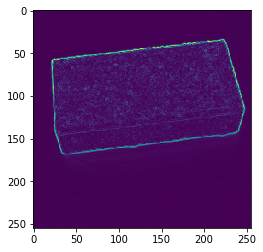

In [3]:
#(Optional) Download data + videos if you don't have them.
import os, sys
sys.path.append('..')
from util.get_and_unpack import get_and_unpack

if not os.path.isdir('../data/'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/data/data.zip'
    get_and_unpack(url)
    
if not os.path.isdir('../videos/'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/videos.zip'
    get_and_unpack(url)   